# <font color='black'><center><center></font> 
![title](img/All.png) 
# <font color='white'><center><center></font> 
# <font><center>Neural Networks & Deep Learning<center></font>
# <font ><center>HW1: Q2<center></font>
## <center>Teacher: Dr. Kalhor<center>
### <center>Student Name: Mohammadali Shakerdargah<center>
### <center>Student Number: 810196487<center>

### <font>Part 0: Initializing and devide data to Training set and Test set</font>


In [1]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("perceptron.csv")
trainSet = df[0:300].copy()
testSet = df[300:400]

In [3]:
testSetNotLabeled = testSet.copy()
x1_df = df['x1']
x2_df = df['x2']
y_df = df['y']
x1_trainSet = trainSet['x1']
x2_trainSet = trainSet['x2']
y_trainSet = trainSet['y']
x1_testToLabel = testSetNotLabeled['x1']
x2_testToLabel = testSetNotLabeled['x2']
y_testToLabel = testSetNotLabeled['y']

### <font>Part A: Sketching Data Using Scatter plot</font>

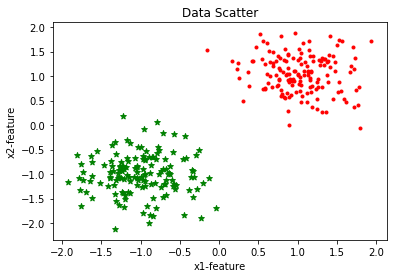

In [4]:
x1_class1=[]
x2_class1=[]
x1_class2=[]
x2_class2=[]
for i in range(len(trainSet)):
    if(y_df[i]==1):
        x1_class1.append(x1_df[i])
        x2_class1.append(x2_df[i])
    elif(y_df[i]==-1):
        x1_class2.append(x1_df[i])
        x2_class2.append(x2_df[i])
plt.scatter(x1_class1, x2_class1, label= "stars", color= "green", marker= "*")
plt.scatter(x1_class2, x2_class2, label= "dots", color= "red", marker= ".")
x_axis = linspace(-2,2, 1000)
plt.title('Data Scatter')
plt.xlabel('x1-feature')
plt.ylabel('x2-feature')
plt.show()

### <font>Part B: Training a neuron based on Percetron algorithm</font>

In [5]:
s_list = []
test_list = []
for i in range(len(trainSet)):
    s_list.append([x1_trainSet[i],x2_trainSet[i]])
s = array(s_list)
for i in range(len(testSet)):
    test_list.append([x1_testToLabel[i+300],x2_testToLabel[i+300]])
test = array(test_list)
t = array(y_trainSet)

In [6]:
#Perceptron algorithm
alpha = 1
theta = 0.1
# theta = 10
# theta = 5000
b=0
w1,w2=0,0
w = [w1,w2]
epoch = 0
z = zeros(len(trainSet))
err = ones(len(trainSet))
while any(err) != any(z):
    for i in range(len(trainSet)):
        net = dot(s[i],w) + b
        if(net > theta):
            h = 1
        elif(abs(net) < theta):
            h = 0
        elif(net < (-1*theta)):
            h = -1
        error_stage = h - t[i]
        err[i] = error_stage
        if(error_stage != 0):
            w1 = w1 + alpha*s[i,0]*t[i]
            w2 = w2 + alpha*s[i,1]*t[i]
            b = b + alpha*t[i]
            w = [w1,w2]
    epoch = epoch+1
print("w1: ",w1)
print("w2: ",w2)
print('b: ',b)
print("Epochs needed: : ", epoch)

w1:  -1.600163552662912
w2:  -1.1626987228737826
b:  0.0
Epochs needed: :  2


### <font>Part C: Showing TestSet Classification and calculating the acuracy</font>

Our acuracy for this modeling is:  100.0


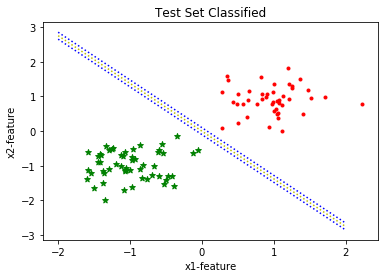

In [9]:
h_test_list = zeros(len(testSet))
for i in range(len(testSet)):
    net = dot(test[i],w)+b
    if(net > theta):
        h_test = 1
    elif(abs(net) < theta):
        h_test = 0
    elif(net < (-1*theta)):
        h_test = -1
    h_test_list[i] = h_test
count = 0 
for i in range(len(testSet)):
    if(h_test_list[i]==df['y'][i+300]):
        count=count+1
print("Our acuracy for this modeling is: ",((count)/(len(testSet))*100))

x1_class1=[]
x2_class1=[]
x1_class2=[]
x2_class2=[]
for i in range(len(testSet)):
    if(y_testToLabel[i+300]==1):
        x1_class1.append(x1_testToLabel[i+300])
        x2_class1.append(x2_testToLabel[i+300])
    elif(y_testToLabel[i+300]==-1):
        x1_class2.append(x1_testToLabel[i+300])
        x2_class2.append(x2_testToLabel[i+300])
plt.scatter(x1_class1, x2_class1, label= "stars", color= "green", marker= "*")
plt.scatter(x1_class2, x2_class2, label= "dots", color= "red", marker= ".")
x_axis = linspace(-2,2, 1000)
plt.plot(x_axis, (-1*(1/w2))*(w1*x_axis+b), ':y');
plt.plot(x_axis, (-1*(1/w2))*(w1*x_axis+b)+theta, ':b');
plt.plot(x_axis, (-1*(1/w2))*(w1*x_axis+b)-theta, ':b');
plt.title('Test Set Classified')
plt.xlabel('x1-feature')
plt.ylabel('x2-feature')
plt.show()

### <font>Part D: Different Threshold</font>

    Completely explained in the report